In [3]:
import json
from openai import OpenAI
from llm_literature import Toolbox, Entity
import voyageai

def process_user_query(user_query, stored_field="medical_research_using_LLM"):
    """
    Processes a user query using OpenAI's chat completion API and custom tools.

    Args:
        user_query (str): The user's query.
        stored_field (str, optional): The stored field of research. Defaults to "medical_research_using_LLM".

    Returns:
        str: The final response from the model.
    """

    available_functions = {
        "author_collaboration": Toolbox.author_collaboration,
        "certain_author": Toolbox.certain_author,
        "certain_entity": Toolbox.certain_entity,
    }

    author_collaboration_tool = {
        'type': 'function',
        'function': {
            'name': 'author_collaboration',
            'description': 'Access the information about the collaboration network of authors in certain area.',
            'parameters': {
                'type': 'object',
                'required': ['field'],
                'properties': {
                    'field': {'type': 'string', 'description': 'The field of the discussion topic. Notice that every key point should be included. You should use the words in users initial query as much as possible.'},
                },
            },
        },
    }

    certain_author_tool = {
        'type': 'function',
        'function': {
            'name': 'certain_author',
            'description': 'Access the information about one of the authors in a certain area regarding articles and collaborations.',
            'parameters': {
                'type': 'object',
                'required': ['field', 'name'],
                'properties': {
                    'field': {'type': 'string', 'description': 'The field of the discussion topic. Notice that every key point should be included. You should use the words in users initial query as much as possible.'},
                    'name': {'type': 'string', 'description': 'The name of the author user wants to query.'},
                },
            },
        },
    }

    certain_entity_tool = {
        'type': 'function',
        'function': {
            'name': 'certain_entity',
            'description': 'The information about certain entity or concept',
            'parameters': {
                'type': 'object',
                'required': ['entity_name'],
                'properties': {
                    'entity_name': {'type': 'string', 'description': 'The name of the entity or concept according to the query of the user. You should use the words in users initial query.'},
                },
            },
        },
    }

    messages = [{'role': 'user', 'content': user_query}]

    chat_client = OpenAI(api_key="ollama", base_url='http://localhost:11434/v1')
    embedding_client = voyageai.Client(api_key="pa-IzZvuh9i6OvyG4ECNKfxZlWOeuk3-i3IMe4d8TsOV84")
    Entity.set_embedding_client(embedding_client)

    response = chat_client.chat.completions.create(
        model="qwen2.5:7b",
        messages=messages,
        tools=[author_collaboration_tool, certain_author_tool, certain_entity_tool],
        tool_choice="auto"
    )

    response_message = response.choices[0].message

    if response_message.tool_calls:
        for tool_call in response_message.tool_calls:
            function_name = tool_call.function.name
            print(f"Name of the used function: {function_name}")
            function_to_call = available_functions.get(function_name)
            function_args = json.loads(tool_call.function.arguments)

            if function_name == "author_collaboration":
                field = stored_field
                if not stored_field and "field" in function_args:
                    stored_field = function_args.get("field")
                    field = stored_field
                
                tools = Toolbox(field=field)
                function_response = tools.author_collaboration()

            elif function_name == "certain_author":
                field = stored_field
                if not stored_field and "field" in function_args:
                    stored_field = function_args.get("field")
                    field = stored_field
                name = function_args.get("name")
                tools = Toolbox(field=field)
                function_response = tools.certain_author(author=name)

            elif function_name == "certain_entity":
                entity_name = function_args.get("entity_name")
                tools = Toolbox(field=stored_field) # Using the stored field here
                function_response = tools.certain_entity(name=entity_name)

            messages.append(response_message)
            messages.append(
                {
                    "tool_call_id": tool_call.id,
                    "role": "tool",
                    "name": function_name,
                    "content": function_response,
                }
            )

        second_response = chat_client.chat.completions.create(
            model="qwen2.5:7b",
            messages=messages,
        )
        return second_response.choices[0].message.content
    else:
        print("no tool was used")
        return response_message.content


# # Example usage:
# user_query = "What is machine learning used in the field of medical research"
# response = process_user_query(user_query)
# print(response)

ModuleNotFoundError: No module named 'llm_literature'

# test

In [2]:
import json
from openai import OpenAI
from llm_literature import Toolbox, Entity
import voyageai

available_functions = {
    "author_collaboration": Toolbox.author_collaboration,
    "certain_author": Toolbox.certain_author,
    "certain_entity": Toolbox.certain_entity,
}

author_collaboration_tool = {
    'type': 'function',
    'function': {
        'name': 'author_collaboration',
        'description': 'Access the information about the collaboration network of authors in certain area.',
        'parameters': {
            'type': 'object',
            'required': ['field'],
            'properties': {
                'field': {'type': 'string', 'description': 'The field of the discussion topic. Notice that every key point should be included. You should use the words in users initial query as much as possible.'},
            },
        },
    },
}

certain_author_tool = {
    'type': 'function',
    'function': {
        'name': 'certain_author',
        'description': 'Access the information about one of the authors in a certain area regarding articles and collaborations.',
        'parameters': {
            'type': 'object',
            'required': ['field', 'name'],
            'properties': {
                'field': {'type': 'string', 'description': 'The field of the discussion topic. Notice that every key point should be included. You should use the words in users initial query as much as possible.'},
                'name': {'type': 'string', 'description': 'The name of the author user wants to query.'},
            },
        },
    },
}

certain_entity_tool = {
    'type': 'function',
    'function': {
        'name': 'certain_entity',
        'description': 'The information about certain entity or concept',
        'parameters': {
            'type': 'object',
            'required': ['entity_name'],
            'properties': {
                'entity_name': {'type': 'string', 'description': 'The name of the entity or concept according to the query of the user. You should use the words in users initial query.'},
            },
        },
    },
}

# Initialize variables
stored_field = "medical_research_using_LLM"  # Store the field for subsequent conversations

ModuleNotFoundError: No module named 'llm_literature'

## Entity test
### Test Question: What is machine learning used in the field of medical research

In [5]:
messages = [{'role': 'user', 'content': 'What is machine learning used in the field of medical research'}]

chat_client = OpenAI(api_key="ollama", base_url='http://localhost:11434/v1')
embedding_client = voyageai.Client(api_key="pa-IzZvuh9i6OvyG4ECNKfxZlWOeuk3-i3IMe4d8TsOV84")
Entity.set_embedding_client(embedding_client)

response = chat_client.chat.completions.create(
    model="qwen2.5:7b",  # Or a newer model that supports function calling
    messages=messages,
    tools=[author_collaboration_tool, certain_author_tool, certain_entity_tool],
    tool_choice="auto"
)

response_message = response.choices[0].message

if response_message.tool_calls:
    for tool_call in response_message.tool_calls:
        function_name = tool_call.function.name
        print(f"Name of the used function: {function_name}")
        function_to_call = available_functions.get(function_name)
        function_args = json.loads(tool_call.function.arguments)

        if function_name == "author_collaboration":
            field = stored_field
            if not stored_field and field:
                stored_field = field
            tools = Toolbox(field=field)
            function_response = tools.author_collaboration()  # 修改此处，移除 field 参数

        elif function_name == "certain_author":
            field = stored_field
            if not stored_field and field:
                stored_field = field
            name = function_args.get("name")
            tools = Toolbox(field=field)
            function_response = tools.certain_author(author=name)  # 修改此处，移除 field 参数

        elif function_name == "certain_entity":
            # field = stored_field # 移除此行，因为 certain_entity 不需要 field 参数
            entity_name = function_args.get("entity_name")
            tools = Toolbox(field="medical_research_using_LLM") 
            
            function_response = tools.certain_entity(name=entity_name)

        messages.append(response_message)  # extend conversation with assistant's reply
        messages.append(
            {
                "tool_call_id": tool_call.id,
                "role": "tool",
                "name": function_name,
                "content": function_response,
            }
        )  

    second_response = chat_client.chat.completions.create(
        model="qwen2.5:7b",
        messages=messages,
    )
    print(second_response.choices[0].message.content)
else:
    print("no tool was used")

Name of the used function: certain_entity
Machine learning is being used extensively in the field of medical research with a variety of applications. Here's an overview based on the provided information:

1. **MACHINE LEARNING RESEARCH**: This involves a resurgence driven by increased access to health data worldwide, leveraging computationally efficient algorithms for healthcare applications.

2. **MACHINE LEARNING-BASED MULTI-LABEL MEDICAL TEXT CLASSIFICATION**: Utilizing machine learning techniques to classify medical texts into multiple labels can enhance the organization and analysis of large datasets within the healthcare field.

3. **ARTIFICIAL INTELLIGENCE IN MEDICINE CONFERENCE**: This conference covers the broad application of AI in medicine, including patient management, ethical considerations, and predictive modeling, showcasing how machine learning fits into this broader spectrum.

4. **CLINICAL NLP RESEARCHERS**: These experts use natural language processing (NLP) techniqu

## Certain Author Test
### Test Question: Introduce the collaboration of the authors in the field of ai powered Medical reaserch.

Name of the used function: author_collaboration
A Total of 544 Documents were Found ( 545 Documents and 1 Duplicates )

UNKNOWN = 544
Based on the provided collaborative insights, we can see that several authors have contributed to key areas in AI-powered medical research. Here’s a summary of their collaboration and contributions:

### Key Authors and Collaborators:
1. **Wang, Yanshan (55246542700)**
   - Contributions: 
     - Foundation metrics for evaluating healthcare conversations powered by generative AI.
     - Ensuring trustworthiness in leveraging generative AI for clinical evidence synthesis.
     - Assertion Detection in Clinical Natural Language Processing using large language models.
     - Identifying Major Depressive Disorder from clinical notes using neural language models.

2. **Fu, Sunyang (57204524255)**
   - Contributions: 
     - Automatic uncovering of patient primary concerns in portal messages using a fusion framework of pretrained language models.
     - FedFSA

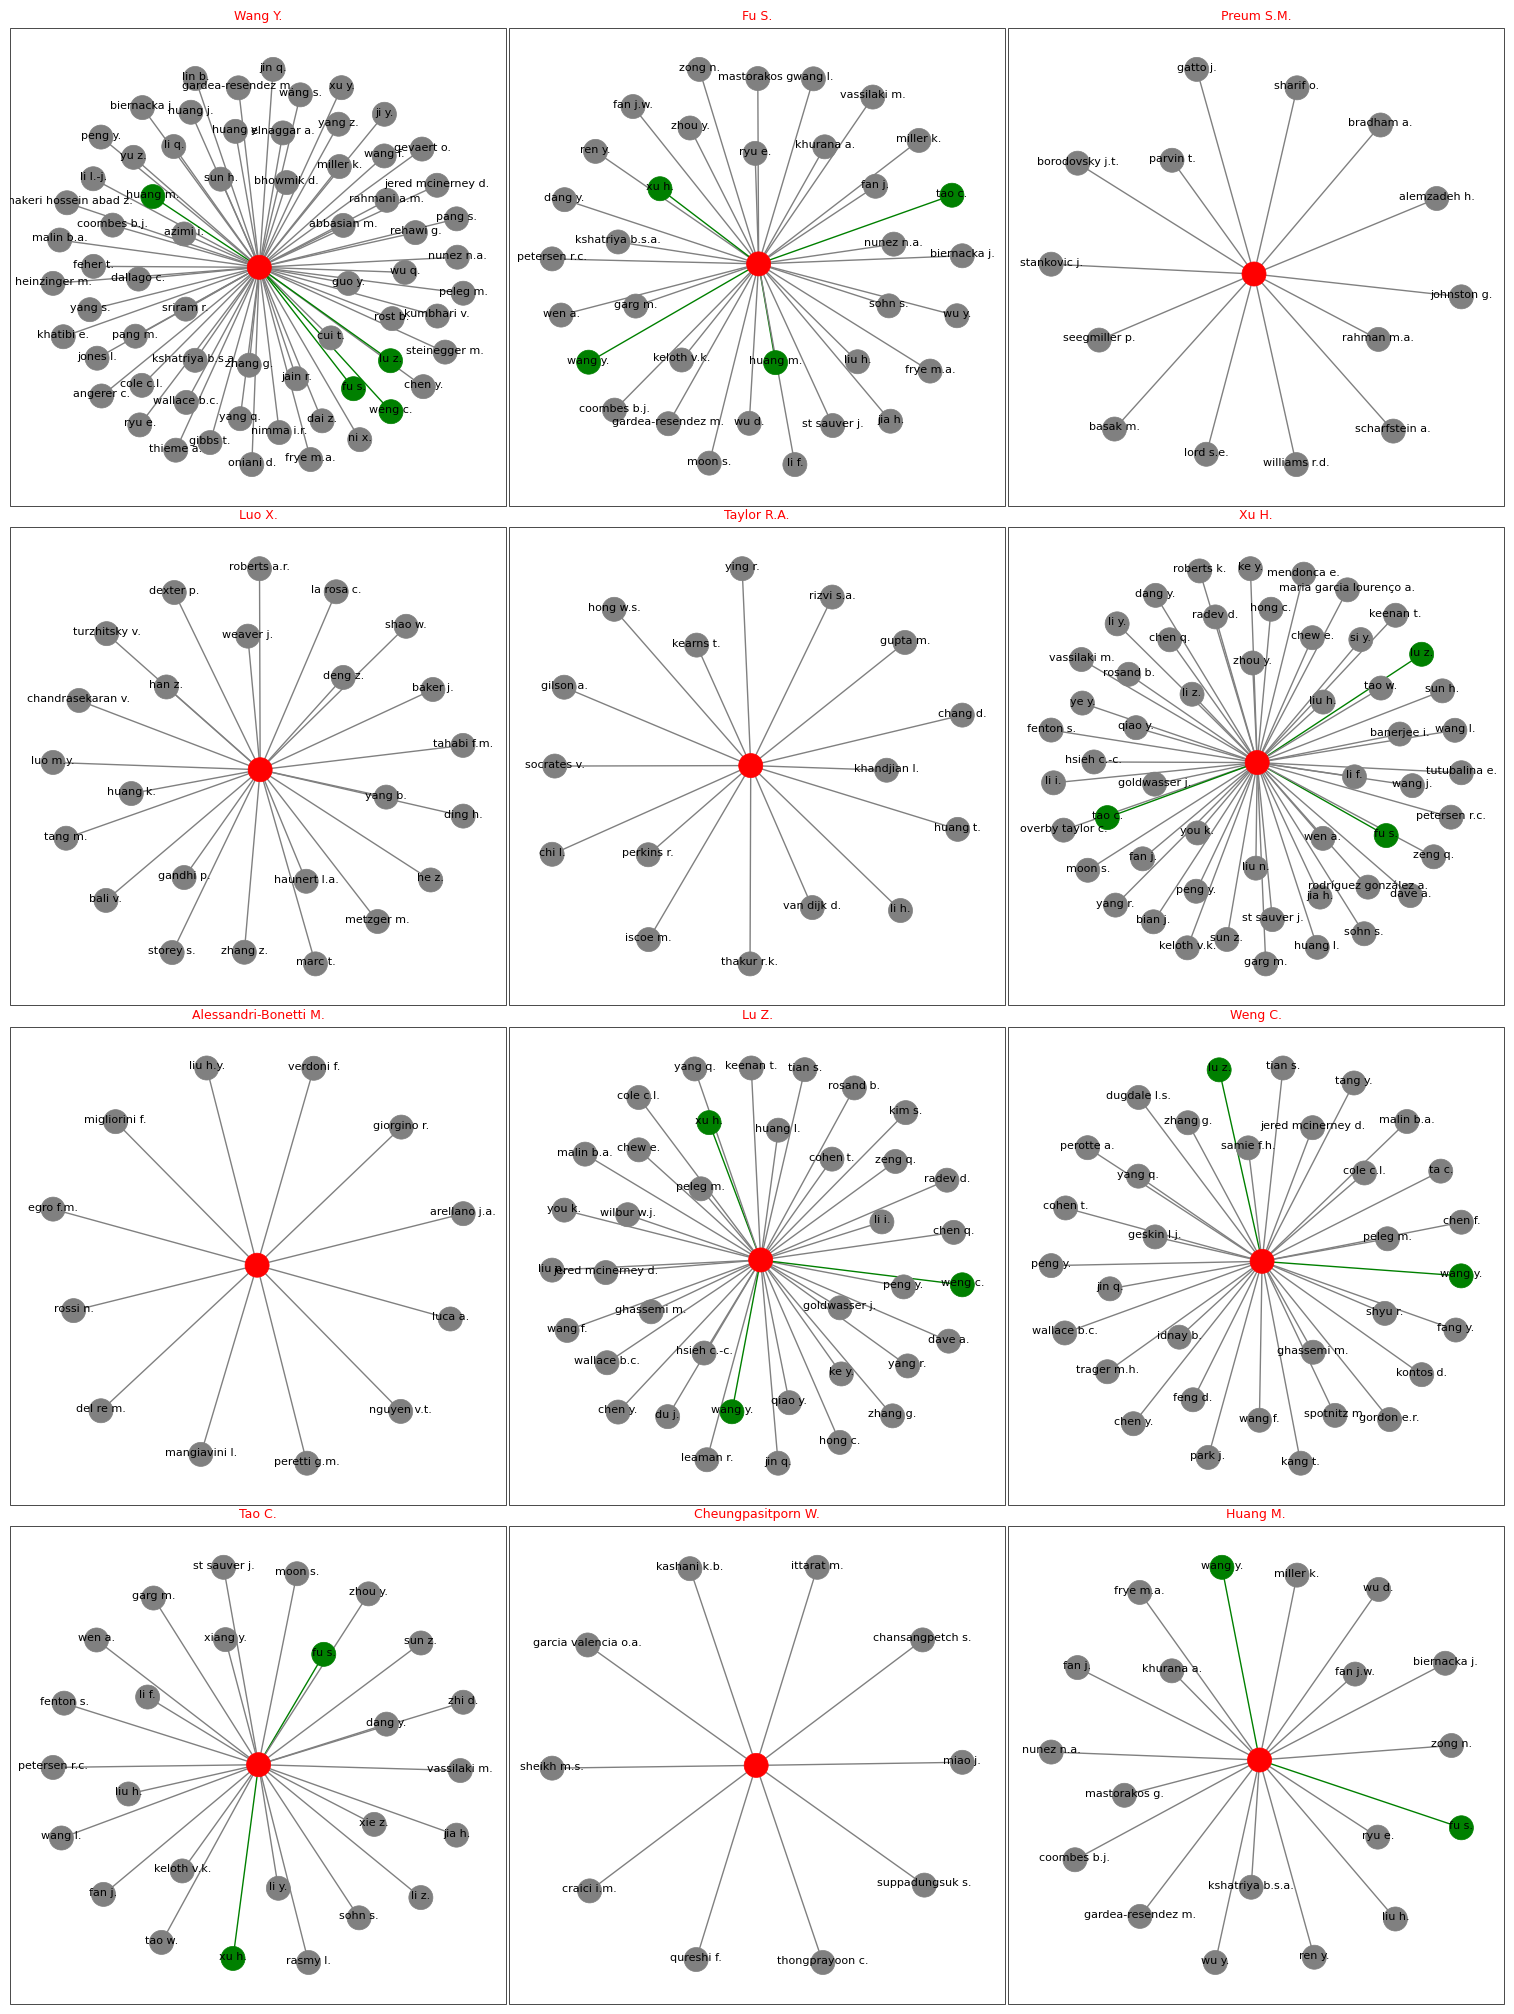

In [6]:
messages = [{'role': 'user', 'content': 'Introduce the collaboration of the authors in the field of ai powered Medical reaserch.'}]

chat_client = OpenAI(api_key="ollama", base_url='http://localhost:11434/v1')
embedding_client = voyageai.Client(api_key="pa-IzZvuh9i6OvyG4ECNKfxZlWOeuk3-i3IMe4d8TsOV84")
Entity.set_embedding_client(embedding_client)

response = chat_client.chat.completions.create(
    model="qwen2.5:7b",  # Or a newer model that supports function calling
    messages=messages,
    tools=[author_collaboration_tool, certain_author_tool, certain_entity_tool],
    tool_choice="auto"
)

response_message = response.choices[0].message

if response_message.tool_calls:
    for tool_call in response_message.tool_calls:
        function_name = tool_call.function.name
        print(f"Name of the used function: {function_name}")
        function_to_call = available_functions.get(function_name)
        function_args = json.loads(tool_call.function.arguments)

        if function_name == "author_collaboration":
            field = stored_field
            if not stored_field and field:
                stored_field = field
            tools = Toolbox(field=field)
            function_response = tools.author_collaboration()  # 修改此处，移除 field 参数

        elif function_name == "certain_author":
            field = stored_field
            if not stored_field and field:
                stored_field = field
            name = function_args.get("name")
            tools = Toolbox(field=field)
            function_response = tools.certain_author(author=name)  # 修改此处，移除 field 参数

        elif function_name == "certain_entity":
            # field = stored_field # 移除此行，因为 certain_entity 不需要 field 参数
            entity_name = function_args.get("entity_name")
            tools = Toolbox(field="medical_research_using_LLM") 
            
            function_response = tools.certain_entity(name=entity_name)

        messages.append(response_message)  # extend conversation with assistant's reply
        messages.append(
            {
                "tool_call_id": tool_call.id,
                "role": "tool",
                "name": function_name,
                "content": function_response,
            }
        )  

    second_response = chat_client.chat.completions.create(
        model="qwen2.5:7b",
        messages=messages,
    )
    print(second_response.choices[0].message.content)
else:
    print("no tool was used")

## Certain Author test
### test question: Introduce the work of Wang Yanshan in the field of AI powered medical research

Name of the used function: certain_author
The name of the author: Wang Yanshan
A Total of 544 Documents were Found ( 545 Documents and 1 Duplicates )

UNKNOWN = 544
Wang Yanshan, affiliated with HealthUnity in Palo Alto, CA, United States and the University of Pittsburgh in Pittsburgh, PA, United States, has been actively involved in multiple research initiatives leveraging AI in medical research. Here are some key contributions:

1. **Foundation Metrics for Evaluating Effectiveness of Healthcare Conversations Powered by Generative AI**:
   - Co-authored with several notable researchers such as Mahyar Abbasian, Elahe Khatibi, Iman Azimi, and David Oniani.
   - This work likely focuses on developing metrics to evaluate the effectiveness of healthcare conversations facilitated by generative AI models.

2. **Leveraging Generative AI for Clinical Evidence Synthesis Needs to Ensure Trustworthiness**:
   - Collaborated with researchers including Gongbo Zhang, Qiao Jin, and Denis McInerney.
 

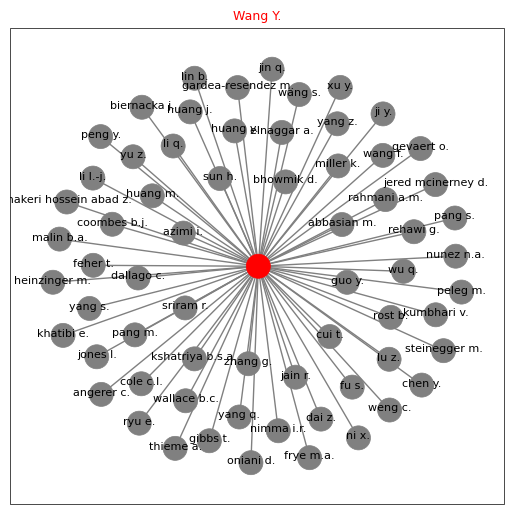

In [10]:
messages = [{'role': 'user', 'content': 'Introduce the work of Wang Yanshan in the field of AI powered medical research'}]

chat_client = OpenAI(api_key="ollama", base_url='http://localhost:11434/v1')
embedding_client = voyageai.Client(api_key="pa-IzZvuh9i6OvyG4ECNKfxZlWOeuk3-i3IMe4d8TsOV84")
Entity.set_embedding_client(embedding_client)

response = chat_client.chat.completions.create(
    model="qwen2.5:7b",  # Or a newer model that supports function calling
    messages=messages,
    tools=[author_collaboration_tool, certain_author_tool, certain_entity_tool],
    tool_choice="auto"
)

response_message = response.choices[0].message

if response_message.tool_calls:
    for tool_call in response_message.tool_calls:
        function_name = tool_call.function.name
        print(f"Name of the used function: {function_name}")
        function_to_call = available_functions.get(function_name)
        function_args = json.loads(tool_call.function.arguments)

        if function_name == "author_collaboration":
            field = stored_field
            if not stored_field and field:
                stored_field = field
            tools = Toolbox(field=field)
            function_response = tools.author_collaboration()  

        elif function_name == "certain_author":
            field = stored_field
            if not stored_field and field:
                stored_field = field
            name = function_args.get("name")
            print(f"The name of the author: {name}")
            name = name.replace(" ", ", ", 1)
            tools = Toolbox(field=field)
            function_response = tools.certain_author(author=name)  

        elif function_name == "certain_entity":
            # field = stored_field # 移除此行，因为 certain_entity 不需要 field 参数
            entity_name = function_args.get("entity_name")
            tools = Toolbox(field="medical_research_using_LLM") 
            
            function_response = tools.certain_entity(name=entity_name)

        messages.append(response_message)  # extend conversation with assistant's reply
        messages.append(
            {
                "tool_call_id": tool_call.id,
                "role": "tool",
                "name": function_name,
                "content": function_response,
            }
        )  

    second_response = chat_client.chat.completions.create(
        model="qwen2.5:7b",
        messages=messages,
    )
    print(second_response.choices[0].message.content)
else:
    print("no tool was used")